In [2]:
# embed image generated by plot
%matplotlib notebook
%matplotlib inline

In [3]:
# import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def setChinese():
    plt.rcParams['font.family'] = ['FangSong']
    plt.rcParams['axes.unicode_minus'] = False

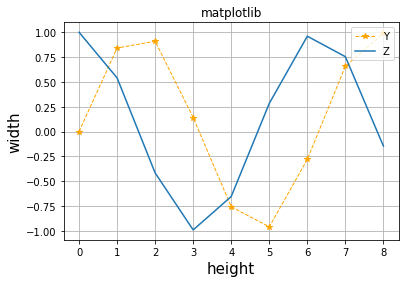

In [4]:
# 6-18 line chart

point_num = 9
x = np.arange(point_num)

y = np.sin(x)
z = np.cos(x)

plt.plot(x, y, marker='*', linewidth=1, linestyle='--', color='orange')
plt.plot(x, z)

plt.title('matplotlib')
plt.xlabel('height', fontsize=15)
plt.ylabel('width', fontsize=15)
plt.legend(['Y', 'Z'], loc='upper right')
plt.grid(True)

plt.show()

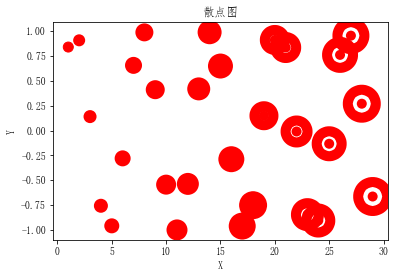

In [5]:
# 6-19 scatter diagram
point_num = 30
x = np.arange(1, point_num)
y = np.sin(x)

setChinese()
plt.title('散点图')

plt.xlabel('X')
plt.ylabel('Y')

linewidth = x
plt.scatter(x, y, c='r', s=100, linewidths=linewidth, marker='o')


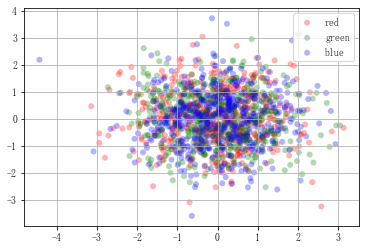

In [6]:
# 6-20 scatter diagram 2
fig, ax = plt.subplots()

setChinese()

colors = ['red', 'green', 'blue']
for color in colors:
    n = 500
    x, y = np.random.randn(2, n)
    
    ax.scatter(x, y, c=color, alpha=0.3, edgecolors='none')

ax.legend(colors, loc='upper right')
ax.grid(True)

plt.show()

<AxesSubplot:>

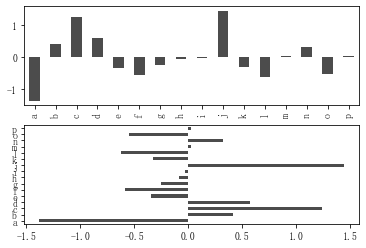

In [7]:
# 6-21 histogram

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='k', alpha=0.7)

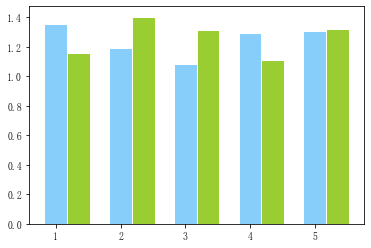

In [8]:
# 6-2 histogram plot by plt
plt.subplots()
setChinese()

x = np.arange(1, 6)
Y1 = np.random.uniform(low=1, high=1.5, size=5)
Y2 = np.random.uniform(low=1, high=1.5, size=5)

plt.bar(x, Y1, width=0.35, facecolor='lightskyblue', edgecolor='white')
plt.bar(x+0.35, Y2, width=0.35, facecolor='yellowgreen', edgecolor='white')

plt.show()

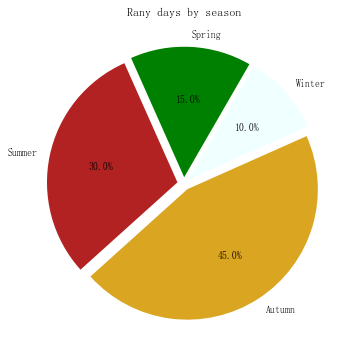

In [9]:
# 6-23 pie graph

plt.figure(figsize=(6, 6))

labels = ['Spring', 'Summer', 'Autumn', 'Winter']
colors = ['green', 'firebrick', 'goldenrod', 'azure']
x = [15, 30, 45, 10]
explode = (0.05, 0.05, 0.05, 0.05) # separate each part

# autopct = % float(1,1) % (% the symbol of pecentage)
# no space separate
plt.pie(x, labels=labels, colors=colors, explode=explode, startangle=60, autopct='%1.1f%%')

plt.title('Rany days by season')
plt.show()

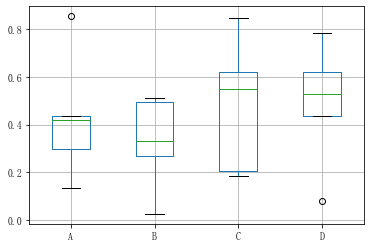

In [10]:
# 6-24 boxploto
np.random.seed(2)

df = pd.DataFrame(np.random.rand(5, 4), columns=['A', 'B', 'C', 'D'])
df.boxplot()
plt.show()

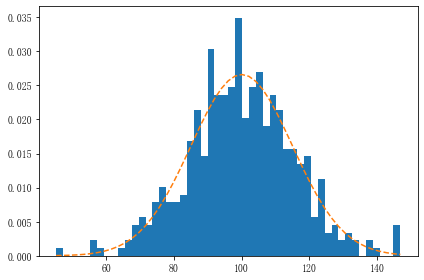

In [11]:
# 6-25  normal histgram
from scipy.stats import norm

fig, ax = plt.subplots()
setChinese()

np.random.seed(1587554)

mu = 100
sigma = 15
x = mu + sigma * np.random.randn(437)

num_bins = 50
n, bins, patches = ax.hist(x, num_bins, density=True)

y = norm.pdf(bins, mu, sigma) # 正态p概率d密度f函数
ax.plot(bins, y , '--')

fig.tight_layout()
plt.show()

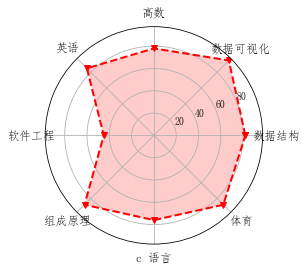

In [12]:
# 6-26 radar graph
setChinese()
courses = ['数据结构', '数据可视化', '高数', '英语', '软件工程', '组成原理', 'c 语言', '体育']
scores = [82, 95, 78, 85, 45, 88, 76, 88]

dataLength = len(scores) # separate parts of the len which count scores
angles = np.linspace(0, 2 * np.pi, dataLength, endpoint=False)

# 绘制雷达图  补全一周
scores_ = scores.copy()
scores_.append(scores[0])
angles_ = np.append(angles, angles[0])
plt.polar(angles_, scores_, 'rv--', linewidth=2)

# 设置角度 网格标签
plt.thetagrids(angles*180/np.pi, courses, fontsize=12)

# 填充雷达图内部
plt.fill(angles, scores, facecolor='red', alpha=0.2)
plt.show()


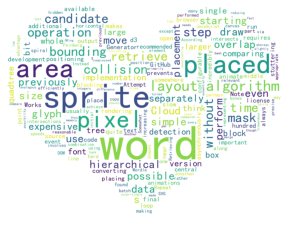

In [18]:
# 6-30 word cloud
from wordcloud import WordCloud, STOPWORDS
import PIL.Image as image
# import numpy as np
# import jieba

def get_word_list(word_list_path):
    f = open(word_list_path, encoding='utf8')
    wordList = f.read()
    return wordList

def get_word_cloud(word_list_path, img_mask_path):
    word_list = get_word_list(word_list_path)
    img_mask = np.array(image.open(img_mask_path))
    
    # load wordlist and set background image mask
    font_path = "C:\Windows\Fonts\simhei.ttf"
    wordcloud = WordCloud(font_path=font_path,background_color='white', mask=img_mask).generate(word_list)

    plt.axis('off') # undisplay axies
    plt.imshow(wordcloud)

import os
src_path = os.path.abspath('.')
word_list_path = '..//data//word1.txt'
img_mask_path = '..//data//heart.jpg'
get_word_cloud(word_list_path, img_mask_path)

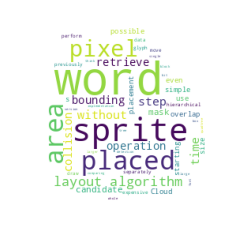

In [14]:
word_list_path = '..//data//word1.txt'
img_mask_path = '..//data//temp1.jpg'
get_word_cloud(word_list_path, img_mask_path)

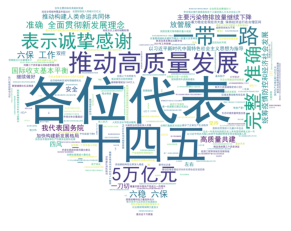

In [19]:
# report
setChinese()
word_list_path = '..//data//report.txt'
img_mask_path = '..//data//heart.jpg'
get_word_cloud(word_list_path, img_mask_path)